In [ ]:
%pip install ucimlrepo

In [ ]:
%pip install sympy==1.12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cud

In [ ]:
import numpy as np
import torch
import pandas as pd
from ucimlrepo import fetch_ucirepo
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
# Fetch the dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)
print("this many rows: ", estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features.shape[0])

# Drop rows with missing values in the features DataFrame
cleaned_features = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features.dropna()

# Update targets based on cleaned features index
cleaned_targets = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets.loc[cleaned_features.index]

# Assign cleaned features and targets to X and y
X = cleaned_features
y = cleaned_targets

print("this many rows after dropping na: ", X.shape[0])

this many rows:  2111
this many rows after dropping na:  2111


In [ ]:
print(X)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [ ]:
print(y)

               NObeyesdad
0           Normal_Weight
1           Normal_Weight
2           Normal_Weight
3      Overweight_Level_I
4     Overweight_Level_II
...                   ...
2106     Obesity_Type_III
2107     Obesity_Type_III
2108     Obesity_Type_III
2109     Obesity_Type_III
2110     Obesity_Type_III

[2111 rows x 1 columns]


In [ ]:
#clean the dataset
# Convert 'Gender' to numerical values
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

# Convert 'family_history_with_overweight' to numerical values
X['family_history_with_overweight'] = le.fit_transform(X['family_history_with_overweight'])

# Convert 'FAVC' to numerical values
X['FAVC'] = le.fit_transform(X['FAVC'])

# Convert 'CAEC' to numerical values
X['CAEC'] = le.fit_transform(X['CAEC'])

# Convert 'SMOKE' to numerical values
X['SMOKE'] = le.fit_transform(X['SMOKE'])

# Convert 'SCC' to numerical values
X['SCC'] = le.fit_transform(X['SCC'])

# Convert 'CALC' to numerical values
X['CALC'] = le.fit_transform(X['CALC'])

# Convert 'MTRANS' to numerical values
X['MTRANS'] = le.fit_transform(X['MTRANS'])

# Convert 'NObeyesdad' to numerical values in y
y['NObeyesdad'] = le.fit_transform(y['NObeyesdad'])


# Now you have numerical data for all the columns in X and the target variable y
print(X.head())
print(y.head())


   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  
0  3.0     2      0   2.0    0  0.0  1.0     3       3  
1  3.0     2      1   3.0    1  3.0  0.0     2       3  
2  3.0     2      0   2.0    0  2.0  1.0     1       3  
3  3.0     2      0   2.0    0  2.0  0.0     1       4  
4  1.0     2      0   2.0    0  0.0  0.0     2       3  
   NObeyesdad
0           1
1           1
2           1
3           5
4           6


In [ ]:
# Scale numerical features using StandardScaler
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y['NObeyesdad'].values, dtype=torch.long)

# Split data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size = 0.25, random_state = 42
)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Define the neural network model
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out



In [ ]:
# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 64
output_size = len(le.classes_)
FFNNmodel = FFNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(FFNNmodel.parameters(), lr=0.01)

# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement
min_delta = 0.001  # Minimum change in validation loss to be considered an improvement
best_val_loss = float("inf")
epochs_without_improvement = 0

#track losses for plots
train_losses = []
val_losses = []

# Training loop with early stopping
epochs = 1000
for epoch in range(epochs):
    # Training
    FFNNmodel.train()
    outputs = FFNNmodel(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
    # Validation
    FFNNmodel.eval()
    with torch.no_grad():
        val_outputs = FFNNmodel(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())

    # Early stopping check
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        best_FFNNmodel_state_dict = FFNNmodel.state_dict()  # Save the best FFNNmodel
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

    if (epoch + 1) % 100 == 0:
        print(
            f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}"
        )

# Load the best FFNNmodel
FFNNmodel.load_state_dict(best_FFNNmodel_state_dict)

# Evaluate the FFNNmodel
with torch.no_grad():
    correct = 0
    total = 0
    outputs = FFNNmodel(X_test)
    _, predicted = torch.max(outputs.data, 1)
    total = y_test.size(0)
    correct = (predicted == y_test).sum().item()
    ffnn_test_acc = 100 * correct / total
    print(f'Accuracy of the network on the test data: {ffnn_test_acc} %')



Epoch [100/1000], Loss: 0.1199, Val Loss: 0.3127
Early stopping at epoch 142
Accuracy of the network on the test data: 90.78014184397163 %


In [ ]:
# prompt: print the f1 score and other relevant metrics

from sklearn.metrics import classification_report

# Evaluate the FFNNmodel and print classification report
with torch.no_grad():
    outputs = FFNNmodel(X_test)
    _, predicted = torch.max(outputs.data, 1)
    print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.87      0.85      0.86        62
           2       0.95      0.92      0.94        78
           3       0.93      0.98      0.96        58
           4       1.00      1.00      1.00        63
           5       0.77      0.82      0.79        56
           6       0.88      0.76      0.82        50

    accuracy                           0.91       423
   macro avg       0.90      0.90      0.90       423
weighted avg       0.91      0.91      0.91       423



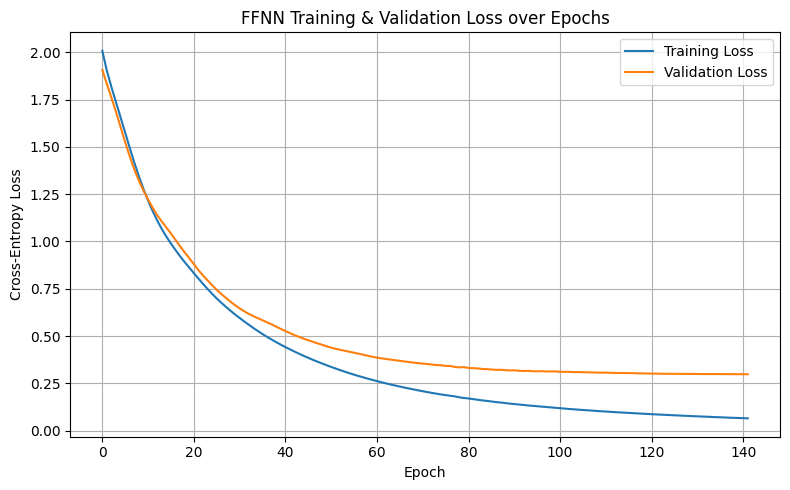

In [ ]:
import matplotlib.pyplot as plt

#plot train and val loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('FFNN Training & Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [1, 0.1, 0.01, 0.001],
    'svm__kernel': ['rbf', 'linear', 'poly']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_svm = grid_search.best_estimator_
svm_test_acc = best_svm.score(X_test, y_test)
print("Test accuracy:", svm_test_acc)

Best hyperparameters: {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'linear'}
Best cross-validation accuracy: 0.9573713858890167
Test accuracy: 0.966903073286052


In [ ]:
# generate a classifaction report from the svm model

from sklearn.metrics import classification_report

y_pred = best_svm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.97      0.92      0.94        62
           2       0.96      0.99      0.97        78
           3       0.98      1.00      0.99        58
           4       1.00      1.00      1.00        63
           5       0.96      0.95      0.95        56
           6       0.96      0.92      0.94        50

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 1) Use your tuned hyperparameters in the base SVM
svm = SVC(
    C=10,
    kernel='linear',
    gamma=1,
    probability=False,
    random_state=42
)

# 2) Wrap it in BaggingClassifier with fixed ensemble settings
bagged_svm = BaggingClassifier(
    estimator=svm,
    n_estimators=20,       # e.g. 20 bags
    max_samples=0.8,       # each bag sees 80% of the data
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=-1,
    random_state=42
)

# 3) Build a pipeline to scale + bagged SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('bagged_svm', bagged_svm)
])

# 4) Fit and evaluate
pipeline.fit(X_train, y_train)
print("Train accuracy:", pipeline.score(X_train, y_train))
print("Test accuracy: ", pipeline.score(X_test, y_test))


Train accuracy: 0.9794628751974723
Test accuracy:  0.9692671394799054


In [ ]:
# generate the report that highlights the importance of certain features towards the prediciton

import pandas as pd
from sklearn.inspection import permutation_importance

# Assuming 'best_svm' is your trained SVM model and 'X_test', 'y_test' are your test data
result = permutation_importance(best_svm, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
})

# Sort by importance
importance_df = importance_df.sort_values('Importance Mean', ascending=False)

print(importance_df)


# Generate a report
report = f"## Feature Importance Report for Obesity Level Prediction\n\n"
report += f"This report details the importance of features in predicting obesity levels using a Support Vector Machine (SVM) model.\n\n"
report += f"**Methodology:** Permutation feature importance was used to assess the impact of each feature on the model's prediction accuracy. Features were randomly permuted, and the decrease in accuracy reflects their importance. Higher importance suggests that the feature is more crucial for accurate predictions.\n\n"
report += f"**Feature Importance Scores:**\n\n"
report += importance_df.to_string(index=False) + "\n\n"
report += f"**Interpretation:**\n\n"

# Analyze top features (customize the threshold as needed)
top_features = importance_df[importance_df['Importance Mean'] > 0.01]  # Example threshold

for index, row in top_features.iterrows():
    report += f"- **{row['Feature']}**: An importance score of {row['Importance Mean']:.3f} indicates that this feature plays a significant role in the model's predictions.  A higher score means greater predictive power.  A lower score indicates this feature is not as predictive.\n"

# Add concluding remarks if needed
report += f"\n**Conclusion:**\n\n"
report += f"The results suggest that certain features are highly influential in the model's ability to determine Obesity Levels. It is worth noting that these findings are specific to the trained model and dataset and might not hold true in other scenarios.\n"

print(report)
# Optionally, you could save this report to a file:
with open("feature_importance_report.txt", "w") as f:
    f.write(report)


                           Feature  Importance Mean  Importance Std
3                           Weight         0.752482        0.011680
2                           Height         0.370686        0.011328
0                           Gender         0.134279        0.011078
7                              NCP         0.023168        0.003783
5                             FAVC         0.011820        0.005070
6                             FCVC         0.011584        0.005228
1                              Age         0.010402        0.007186
4   family_history_with_overweight         0.006147        0.004122
8                             CAEC         0.005910        0.001906
11                             SCC         0.004965        0.001964
15                          MTRANS         0.004492        0.003073
12                             FAF         0.003310        0.003538
9                            SMOKE         0.002128        0.001273
14                            CALC         0.000

In [ ]:
# prompt: remove the insignificant features

# Assuming 'importance_df' is the DataFrame from the previous code
# ... (previous code remains unchanged)

# Define a threshold for feature importance
importance_threshold = 0.01

# Identify insignificant features
insignificant_features = importance_df[importance_df['Importance Mean'] <= importance_threshold]['Feature'].tolist()

# Remove insignificant features from the DataFrame X
X_reduced = X.drop(columns=insignificant_features)

print(f"Removed features: {insignificant_features}")

# Convert the updated data to PyTorch tensors
X_tensor_reduced = torch.tensor(X_reduced.values, dtype=torch.float32)


# Split the reduced data into training, validation, and testing sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_tensor_reduced, y_tensor, test_size=0.2, random_state=42
)
# X_train_reduced, X_val_reduced, y_train_reduced, y_val_reduced = train_test_split(
#     X_train_reduced, y_train_reduced, test_size=0.25, random_state=42
# )


#Redefine input size
input_size_reduced = X_train_reduced.shape[1]

# Reinitialize the model with the reduced input size
model_reduced = FFNN(input_size_reduced, hidden_size, output_size) #hidden_size and output_size remain unchanged
criterion_reduced = nn.CrossEntropyLoss()
optimizer_reduced = optim.Adam(model_reduced.parameters(), lr=0.01)

# ... (rest of the training and evaluation code using X_train_reduced, X_val_reduced, X_test_reduced, etc.)


Removed features: ['family_history_with_overweight', 'CAEC', 'SCC', 'MTRANS', 'FAF', 'SMOKE', 'CALC', 'CH2O', 'TUE']


In [ ]:
# prompt: now train a new svm model with the new datasets while still applying the same optimization techniques from the first svm model

# Assuming 'best_svm' is your trained SVM model and 'X_test', 'y_test' are your test data
# ... (previous code remains unchanged)

# Now, let's train a new SVM model with the reduced dataset, using the same optimized parameters as before.
# We'll reuse the best parameters found in the previous GridSearchCV

best_params = grid_search.best_params_

relevant_params = {key.replace('svm__', ''): value for key, value in best_params.items()}

# Create a new SVM model with the extracted parameters
new_svm_model = SVC(**relevant_params)  # Use extracted parameters from the previous grid search

# Fit the new SVM model on the reduced dataset
new_svm_model.fit(X_train_reduced, y_train_reduced)

# Evaluate the new SVM model on the test set
new_test_accuracy = new_svm_model.score(X_test_reduced, y_test_reduced)
print("Test accuracy of new SVM model with reduced features:", new_test_accuracy)

# Generate predictions for the new model
y_pred_new = new_svm_model.predict(X_test_reduced)
print(classification_report(y_test_reduced, y_pred_new))


Test accuracy of new SVM model with reduced features: 0.9739952718676123
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.97      0.95      0.96        62
           2       0.99      0.97      0.98        78
           3       0.97      1.00      0.98        58
           4       1.00      1.00      1.00        63
           5       0.96      0.93      0.95        56
           6       0.94      0.98      0.96        50

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# 1. Build pipeline
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', KNeighborsClassifier())
])

# 2. Define param grid
param_grid = {
    'knn__n_neighbors': list(range(1, 21)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# 3. Run grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    n_jobs=-1
)
grid_search.fit(X_train_reduced, y_train_reduced)

# 4. Enforce generalization gap constraint
results = grid_search.cv_results_
valid_indices = [
    i for i in range(len(results['params']))
    if results['mean_train_score'][i] - results['mean_test_score'][i] <= 0.1
]

# 5. Select best model and refit
if valid_indices:
    best_index = max(valid_indices, key=lambda i: results['mean_test_score'][i])
    best_params = results['params'][best_index]
    print("✅ Best model with generalization gap ≤ 0.1:")
    print("Params:", best_params)
    print("Train acc: {:.3f}".format(results['mean_train_score'][best_index]))
    print("CV acc:    {:.3f}".format(results['mean_test_score'][best_index]))
    print("Gap:       {:.3f}".format(
        results['mean_train_score'][best_index] - results['mean_test_score'][best_index]
    ))

    # Refit pipeline with best parameters
    best_knn = pipeline.set_params(**{f"knn__{k.split('__')[1]}": v for k, v in best_params.items()})
    best_knn.fit(X_train_reduced, y_train_reduced)

    # ✅ Evaluate using 5-fold cross_val_score
    final_scores = cross_val_score(best_knn, X_train_reduced, y_train_reduced, cv=5, scoring='accuracy')
    print("Final 5-fold CV accuracy: {:.3f} ± {:.3f}".format(final_scores.mean(), final_scores.std()))
else:
    print("❌ No models found with generalization gap ≤ 0.1.")

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


✅ Best model with generalization gap ≤ 0.1:
Params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Train acc: 0.933
CV acc:    0.867
Gap:       0.066
Final 5-fold CV accuracy: 0.867 ± 0.014


In [ ]:
print(classification_report(y_test_reduced, best_knn.predict(X_test_reduced)))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        56
           1       0.75      0.81      0.78        62
           2       0.93      0.95      0.94        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.85      0.71      0.78        56
           6       0.81      0.84      0.82        50

    accuracy                           0.89       423
   macro avg       0.89      0.88      0.88       423
weighted avg       0.89      0.89      0.89       423



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np

# 1) Define base learners
mlp = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    batch_size=64,
    learning_rate_init=1e-3,
    max_iter=200,
    random_state=42
)
mlp_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

svm_base = SVC(
    C=10, kernel='linear', gamma=1,
    probability=True, random_state=42
)
bagged_svm = BaggingClassifier(
    estimator=svm_base,
    n_estimators=20,
    max_samples=0.8,
    n_jobs=-1,
    random_state=42
)
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', bagged_svm)
])

knn_pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', KNeighborsClassifier(
        n_neighbors=3,
        weights='uniform',
        metric='manhattan'
    ))
])

# 2) Define ensemble
voting = VotingClassifier(
    estimators=[
        ('mlp', mlp_pipe),
        ('svm', svm_pipe),
        ('knn', knn_pipe)
    ],
    voting='soft',
    weights=[1, 3, 1],
    n_jobs=-1
)

# 3) 5-Fold Cross-validation on entire dataset
cv_scores = cross_val_score(
    voting,
    X=X_train_reduced.numpy(),  # Convert torch tensor to NumPy
    y=y_train_reduced.numpy(),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 4) Report
print("5-Fold CV test accuracies:", np.round(cv_scores, 4))
print("Average test accuracy:    {:.4f}".format(np.mean(cv_scores)))

5-Fold CV test accuracies: [0.9734 0.9615 0.9675 0.9763 0.9792]
Average test accuracy:    0.9716


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Cross-validation predictions
y_pred_cv = cross_val_predict(
    voting, X=X_test_reduced.numpy(), y=y_test_reduced.numpy(), cv=5, n_jobs=-1
)

# Print classification report
print(classification_report(y_test_reduced.numpy(), y_pred_cv))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       0.95      0.89      0.92        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.81      0.89      0.85        56
           6       0.94      0.88      0.91        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



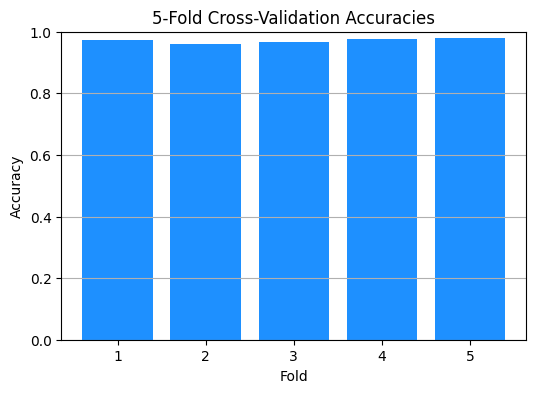

In [ ]:
#WE MAY NOT HAVE TO KEEP THIS CELL OF CODE.

plt.figure(figsize=(6,4))
plt.bar(range(1, 6), cv_scores, color='dodgerblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Accuracies')
plt.ylim(0, 1)
plt.xticks(range(1, 6))
plt.grid(axis='y')
plt.show()

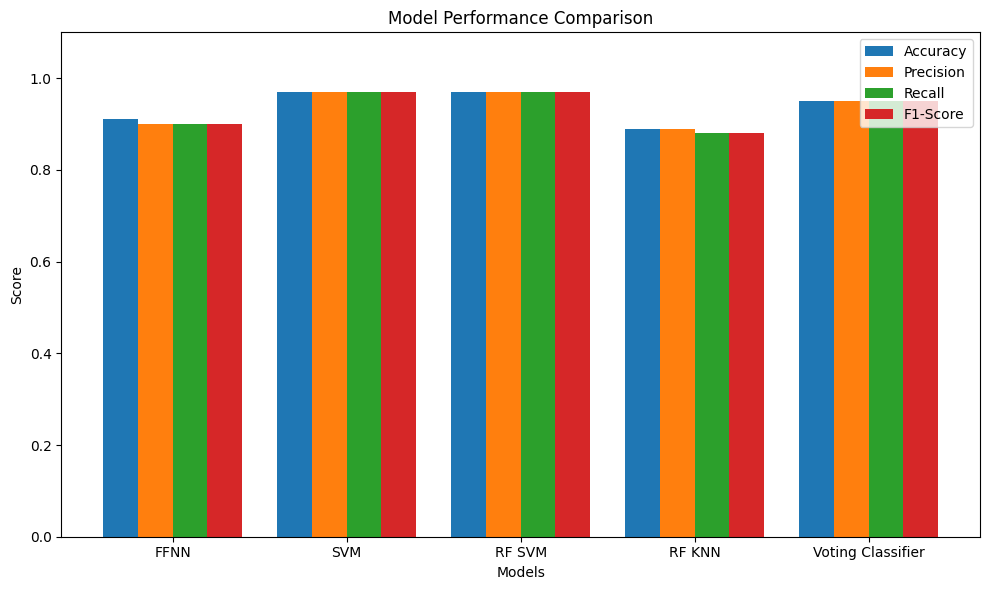

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
models = ['FFNN', 'SVM', 'RF SVM', 'RF KNN', 'Voting Classifier']
accuracy = [0.91, 0.97, 0.97, 0.89, 0.95]
precision = [0.9, 0.97, 0.97, 0.89, 0.95]
recall = [0.9, 0.97, 0.97, 0.88, 0.95]
f1_score = [0.9, 0.97, 0.97, 0.88, 0.95]

# Bar settings
x = np.arange(len(models))  # label locations
width = 0.2  # width of each bar

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1_score, width, label='F1-Score')

# Formatting
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()